# Clasificación de vehiculos: bicicletas y coches

*José Eduardo Castaño López y Brenda Villaseñor Feixas*

## Explicación del problema

Se busca reconocer el tipo de vehículos en la imagen, entre: bicicletas y coches.

Las **entradas** de la red corresponden a imagenes que contengan algún vehículo. Las **salidas** corresponden a la etiqueta del tipo de vehículo. En este caso, las estiquetas estarán dadas por una clasificación binaria, la cual dará los valores de **0** o **1**, dependiendo de si es una bicicleta (o motocicleta) o un coche respectivamente.

El data set se obtuvo de la siguiente página de Kaggle: https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset

In [1]:
# Importamos las bibliotecas que usaremos en nuestro modelo

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, Conv2D, MaxPooling2D 
from tensorflow.keras import backend as K
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorboard.plugins.hparams import api as hp
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import SVG
import scipy.io as sio
import sklearn as sk
import pandas as pd
import numpy as np
import os

# Visualización de los datos a trabajar

In [2]:
# Definimos las rutas de las carpetas de las imagenes 
data = 'D:\pepe2\Documents\QuackRepository\Quack\AI\Car-Bike-Dataset'

In [3]:
# Mostramos las clases de imagenes que se van a clasificar
os.listdir(data)

['Bike', 'Car']

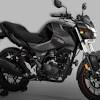

In [4]:
# Mostramos unas imagenes de ejemplo para la clase 0
from IPython.display import Image
Image(filename=data + '\Bike\Bike (1).jpeg')

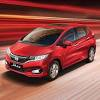

In [5]:
# Mostramos unas imagenes de ejemplo para la clase 1
from IPython.display import Image
Image(filename=data + '\Car\Car (1).jpeg')

## Creación de la red

### Definición de los parámetros para la red

In [6]:
# Reescalamos las imagenes a 100x100 pixeles
img_width, img_height = 32, 32

# Definimos el tamaño del batch
batch_size = 32

# Definimos el numero de epocas
epochs = 50

# Definimos el numero de clases
num_classes = 2

# Definimos el numero de imagenes de entrenamiento
train_samples = 1600

# Definimos el numero de imagenes de validacion
validation_samples = 400

# Definimos el numero de filtros
filters = 32

# Definimos el tamaño del kernel
kernel_size = (3, 3)

# Definimos el tamaño del pool
pool_size = (2, 2)

# Definimos el numero de capas
num_layers = 3

# Definimos el numero de neuronas
num_neurons = 128

# Definimos el numero de neuronas de salida
num_output = 2

# Definimos el numero de neuronas de entrada
num_input = 100

### Preparación de los datos (división y normalización)

In [7]:
# Normalizamos las imagenes
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2)

# Normalizamos las imagenes
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Cargamos las imagenes de entrenamiento
train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

# Cargamos las imagenes de validacion
validation_generator = train_datagen.flow_from_directory(
    data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


### Modelo de la red

In [8]:
#Definimos el modelo
def model_car_bike():
    model = Sequential() #Escogemos el modelo secuencial
    model.add(Conv2D(filters, kernel_size, padding='same', activation='relu', input_shape=(img_width, img_height, 3))) #Añadimos la primera capa de convolucion
    model.add(MaxPooling2D(pool_size=pool_size)) #Añadimos la primera capa de pooling de 2x2
    model.add(Flatten()) #Aplicamos la funcion de aplanamiento para convertir la matriz en un vector
    model.add(Dense(128,activation='relu')) #Añadimos una capa densa para conectar todas las neuronas de la capa anterior
    model.add(Dense(1, activation='sigmoid')) #Añadimos una capa densa de salida con una neurona y funcion de activacion sigmoide para clasificacion binaria con salida entre 0 y 1
    
    return model

In [9]:
model = model_car_bike() #Guardamos el modelo en una variable
model.summary() #Mostramos un resumen del modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,049,729
Trainable params: 1,049,729
Non-trainable params: 0
______________________________________________

### Entrenamiento de la red

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #Compilamos el modelo con la funcion de perdida binary_crossentropy, el optimizador adam y la metrica accuracy

In [11]:
# Calculamos los validation steps
validation_steps = validation_samples // batch_size
validation_steps

12

In [12]:
#Utilizamos keras.fit_generator para entrenar el modelo
history = model.fit_generator(
    train_generator, #Utilizamos el generador de imagenes de entrenamiento
    steps_per_epoch=20, #Definimos el numero de pasos por epoca
    epochs=epochs, #Definimos el numero de epocas
    validation_data=validation_generator, #Utilizamos el generador de imagenes de validacion
    validation_steps=validation_steps) #Definimos el numero de pasos por epoca de validacion

C:\Users\pepe2\AppData\Local\Temp\ipykernel_14852\2730122414.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
18/20 [==========================>...] - ETA: 0s - loss: 0.7774 - accuracy: 0.4826

c:\Users\pepe2\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 [==============================] - 15s 563ms/step - loss: 0.7693 - accuracy: 0.4875 - val_loss: 0.6788 - val_accuracy: 0.5234
Epoch 2/50
20/20 [==============================] - 7s 342ms/step - loss: 0.6730 - accuracy: 0.5594 - val_loss: 0.6510 - val_accuracy: 0.5885
Epoch 3/50
20/20 [==============================] - 6s 282ms/step - loss: 0.6391 - accuracy: 0.6906 - val_loss: 0.6256 - val_accuracy: 0.6979
Epoch 4/50
20/20 [==============================] - 7s 315ms/step - loss: 0.5809 - accuracy: 0.7422 - val_loss: 0.5725 - val_accuracy: 0.7214
Epoch 5/50
20/20 [==============================] - 5s 231ms/step - loss: 0.5198 - accuracy: 0.7734 - val_loss: 0.5184 - val_accuracy: 0.7682
Epoch 6/50
20/20 [==============================] - 6s 290ms/step - loss: 0.4568 - accuracy: 0.8141 - val_loss: 0.5227 - val_accuracy: 0.7682
Epoch 7/50
20/20 [==============================] - 5s 246ms/step - loss: 0.4552 - accuracy: 0.8047 - val_loss: 0.5995 - val_accuracy: 0.6615
Epoch 8/50
20/20

### Análisis del funcionamiento de la red (Loss & Accuracy)

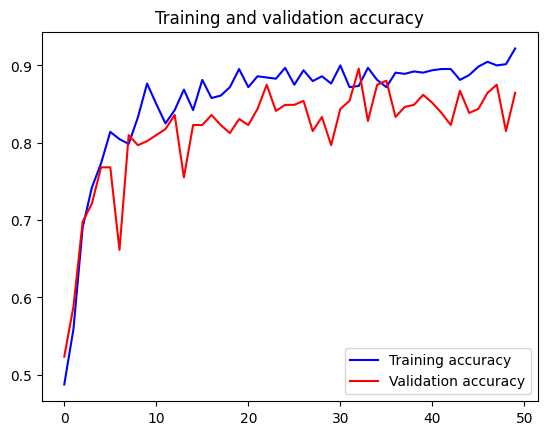

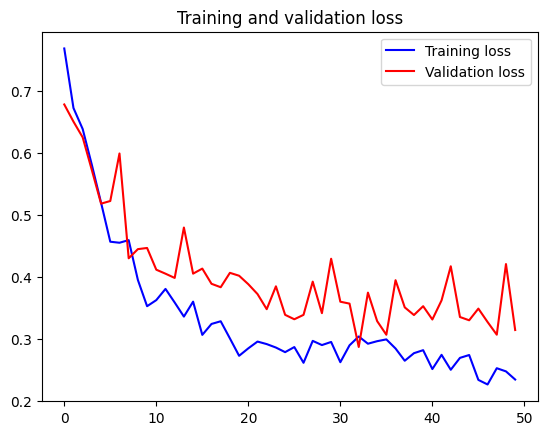

In [13]:
# Guardamos el modelo
model.save_weights('model_saved.h5')

# Graficamos la precision y la perdida del modelo
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficamos la precision del modelo
epochs = range(len(acc))
plt.figure()
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Graficamos la perdida del modelo
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


## Inferencia con datos de prueba

### Probamos con una imagen externa

In [22]:
# Hacemos una prediccion del modelo con una imagen desde el directorio
from tensorflow.keras.preprocessing import image
import numpy as np

img_pred = image.load_img('D:\pepe2\Documents\QuackRepository\Quack\AI\descarga (1).jpg', target_size=(32, 32))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)

1/1 [==============================] - 0s 74ms/step


In [23]:
rslt

array([[1.]], dtype=float32)

car


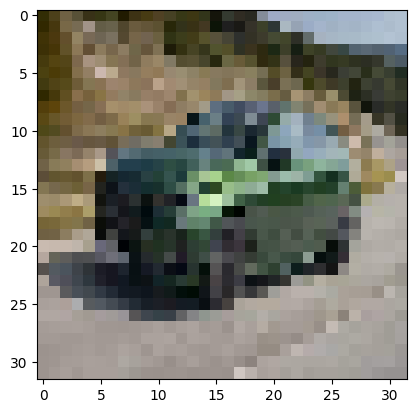

In [32]:
if round(rslt[0][0]) == 1:
    prediction = "car"
if round(rslt[0][0]) == 0:
    prediction = "bike"
print(prediction)

# Mostramos la imagen
import matplotlib.pyplot as plt
plt.imshow(image.load_img('D:\pepe2\Documents\QuackRepository\Quack\AI\descarga (1).jpg', target_size=(32, 32)))
plt.show()

In [31]:
# Hacemos predicción con los datos de test  
test_generator = test_datagen.flow_from_directory(
    data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_steps = test_generator.samples // batch_size

# Evaluamos el modelo con los datos de test
calif = model.evaluate_generator(test_generator, steps=test_steps)

print('Pérdida' ,calif[0])
print('Accuracy', calif[1])

Found 4000 images belonging to 2 classes.


C:\Users\pepe2\AppData\Local\Temp\ipykernel_14852\1433606935.py:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  calif = model.evaluate_generator(test_generator, steps=test_steps)
c:\Users\pepe2\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Pérdida 0.3324775993824005
Accuracy 0.8629999756813049


1/1 [==============================] - 0s 39ms/step


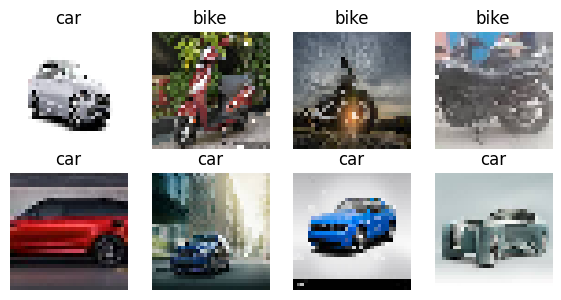

In [60]:
# Obtenemos las imagenes del generador test utilizando un iterador (next)
test_im,test_lab = next(test_generator) #Si no ponemos dos variables, nos guarda todo el resultado en una matriz y queremos dos vectores

# Realizamos las inferencias con las imagenes de test
prediccion = model.predict(test_im)

# Graficamos las imagenes de test con su prediccion
fig = plt.figure(figsize=(7, 7))
for i in range(8):
    fig.add_subplot(4, 4, i + 1)
    plt.imshow(test_im[i])
    plt.axis('off')
    plt.title('car' if round(prediccion[i][0])==1 else 'bike')

## Discusión de resultados

La red presentada en el presente trabajo es una red del tipo convolucional de una sola capa convolutiva y un max pooling. Esta red sencilla nos permitió obtener una precisión de casi el 90% con un entrenamiento de 50 épocas, puesto que el tipo de clasificación binaria no requiere de una red muy robusta para dar buenos resultados. 

Se pudo corroborar que las predicciones son bastante certeras al probar con una imagen externa de una bicicleta y obtener su clasificación adecuadamente.

Finalmente, esta red puede implementarse para cualquier tipo de clasificación binaria de imágenes de cualquier índole.